![alternatvie text](https://www.doc.zuv.fau.de//M/FAU-Logo/01_FAU_Kernmarke/Web/FAU_Kernmarke_Q_RGB_blue.svg)


# Assignment 1: Small Scale Data (Classification)

In this assignment basic functionalities of [PyTorch](https://pytorch.org) will be explored for small datasets. The goal is to work on how to load images, pre-process the images and perform data augmentation. Finally, a deep neural network will be trained to perform image classification.

Note that all scripts should be self-contained and executed on *any* machine that has the required libraries installed. Moreover, you'll need to install PyTorch prior to starting this tutorial. This can be done using pip or conda. For more info. check [Install PyTorch](https://www.scaler.com/topics/pytorch/install-pytorch/) [Install PyTorch on Jupyter](https://timoast.github.io/blog/installing-pytorch/)

The solutions of the assignment can be delivered as Python Notebooks or .py files.



## Data loading 

In this task, the data will be loaded in two different way. At first, the `torchvision.datasets` subclasses will be used to load a dataset. Second, you will write your own dataset loader that performs the same activity. In the second case, the data and labels will be loaded from the hard-drive. Alternatively, they can be loaded from the RAM memory. Both solutions are acceptable. Only the train set is required. The datasets are [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) and [MNIST](http://yann.lecun.com/exdb/mnist/). Finally, the data samples and labels will be visualized. 

*Task Output*: It will be **two** different data loaders for MNIST and Fashion-MNIST. To demonstrate the data loading, the images and the corresponding labels should be vizualized. For the **visualization of the image and label**, you may use any library that you wish (e.g. [matplotlib](http://matplotlib.org/)).

*Important*: The scripts should be **self-contained**. This means that the custom dataloader should: 1. check whether the dataset is locally stored and 2. download it from the web if it not locally stored.

Tip: If it is not clear what is the train / test set when loading the data, you may check on the web-page of the dataset or on the related publication.

### a) Built-in Torch Dataloader

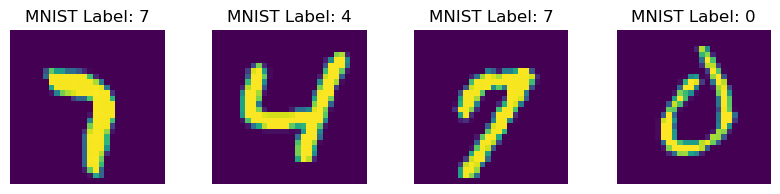

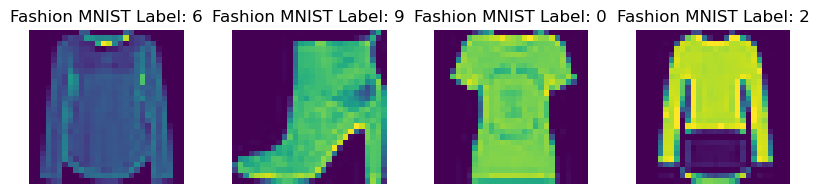

In [280]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets
import matplotlib.pyplot as plt

# Tranform function to convert into Tensor
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Dataloader MNIST
mnist_builtIn_dataloader = DataLoader(
    datasets.MNIST(
        root = './data',
        train = True,
        download = True,
        transform = transform
    ), batch_size = 4, shuffle = True
)

# Dataloader Fashion-MNIST
fashion_mnist_builtIn_dataloader = DataLoader(
    datasets.FashionMNIST(
        root = './data',
        train = True,
        download = True,
        transform = transform
    ), batch_size = 4, shuffle = True
)

# Function to show images and labels
def visualizeImage (images, labels, dataset):
    fig, axes = plt.subplots(1, len(images), figsize = (10,2))
    for index, (image, label) in enumerate(zip(images, labels)):
        axes[index].imshow(image.squeeze())
        axes[index].set_title(f'{dataset} Label: {label}')
        axes[index].axis('off')
    plt.show()

# Visualizing MNIST dataset
for images, labels in mnist_builtIn_dataloader:
    visualizeImage(images, labels, 'MNIST')
    break

# Visualizing Fashion MNIST dataset
for images, labels in fashion_mnist_builtIn_dataloader:
    visualizeImage(images, labels, 'Fashion MNIST')
    break

### b) Customized Dataset

In this part you're asked to implement your own CustomDataset class instead of using PyTorch built-in function. To this end, you'll have to implement a function which downloads the datasets, you may use this download link 'http://yann.lecun.com/exdb/mnist/'. Also, you can rely on this documentation to handle [Gzip](https://docs.python.org/3/library/gzip.html#:~:text=To%20open%20a%20compressed%20file,and%20produces%20the%20most%20compression.) file format i.e. unzip file. Additional information on CustomDataset class can be obtained here [PyTorch Dataset](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html).

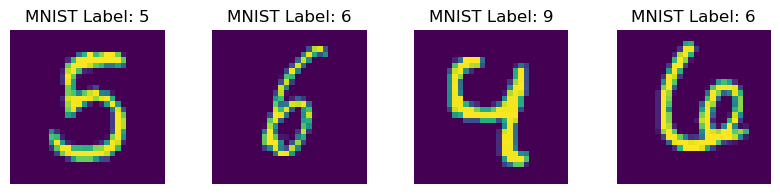

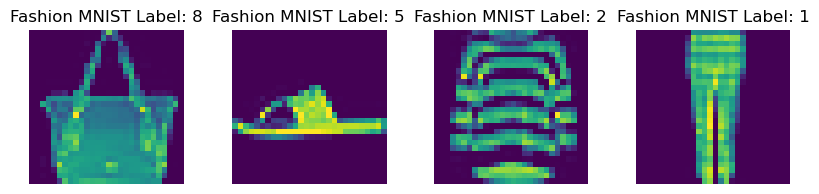

In [281]:
import os
import urllib.request
import gzip
import numpy as np

# Creating a custom dataset
class CustomClassification(Dataset):
   
    def __init__(self, root, train = True, transform = None, url = None):
        self.root = root
        self.train = train
        self.transform = transform
        self.url = url

        # Data and label for training or testing
        self.data_file = 'train-images-idx3-ubyte.gz' if train else 't10k-images-idx3-ubyte.gz'  
        self.label_file = 'train-labels-idx1-ubyte.gz' if train else 't10k-labels-idx1-ubyte.gz'

        # Set path for data and label to be stored
        self.data_path = os.path.join(self.root, self.data_file)
        self.label_path = os.path.join(self.root, self.label_file)

        # Check if data and label present locally - or else download 
        if not os.path.exists(self.data_path) or not os.path.exists(self.label_path):
            os.makedirs(self.root, exist_ok = True)
            self.downloadDataset()

        # Load labels and store them
        with gzip.open(self.label_path, 'rb') as f:
            magic_num, num_label = np.frombuffer(f.read(8), dtype=np.int32)
            self.labels = np.frombuffer(f.read(), dtype=np.uint8)

        # Load data and store them
        with gzip.open(self.data_path, 'rb') as f:
            magic_num, num_images, num_rows, num_cols = np.frombuffer(f.read(16), dtype=np.int32)
            if self.train:
                self.data = np.frombuffer(f.read(), dtype=np.uint8).reshape(60000, 28, 28)
            else:
                self.data = np.frombuffer(f.read(), dtype=np.uint8).reshape(10000, 28, 28)
        
    def __len__(self):
        return len(self.labels)

    # If dataset doesn't exist locally, download using the url
    def downloadDataset(self):
        url = self.url
        file_names = [self.data_file, self.label_file]

        for file_name in file_names:
            file_url = url + file_name
            file_path = os.path.join(self.root, file_name)
            urllib.request.urlretrieve(file_url, file_path)

    # To retrieve an image and label from dataset for a given index
    def __getitem__(self,idx):
        image, label = self.data[idx], self.labels[idx]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label
        
# Dataloader MNIST dataset
mnist_custom_dataset = CustomClassification(
        root = './data/mnist', 
        train = True, 
        transform = transform, 
        url = 'http://yann.lecun.com/exdb/mnist/'
)
mnist_custom_dataloader = DataLoader(
        mnist_custom_dataset, 
        batch_size = 4, 
        shuffle = True
)

# Dataloader Fashion-MNIST dataset
fashion_mnist_custom_dataset = CustomClassification(
        root = './data/Fashionmnist', 
        train = True, 
        transform = transform, 
        url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/'
)
fashion_mnist_custom_dataloader = DataLoader(
        fashion_mnist_custom_dataset, 
        batch_size = 4, 
        shuffle = True
)

# Visualizing MNIST dataset
for images, labels in mnist_custom_dataloader:
    visualizeImage(images, labels, 'MNIST')
    break

# Visualizing Fashion MNIST dataset
for images, labels in fashion_mnist_custom_dataloader:
    visualizeImage(images, labels, 'Fashion MNIST')
    break

## 2. Model training 

In this task, the MNIST and [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset will be employed for learning a classifier. The classifier will be a convolutional neural network. You are free to decide for the network architecture. However, it should include at least 2 `nn.Conv2d` operations and at least 1 `nn.Linear` operation. The activation should be ReLU. The loss function will be the cross-entropy. Training will take place based on the train set of the dataset, also you should use part of the train set as validation and save the model with the best validation score. The test set will be used only for evaluation. Finally, the custom data-loader which has been implemented earlier will be employed here. Since there is train and test set, the data loader might need adaptation.

Parameter learning: The computation of the gradients and the optimization will be based on Pytorch (`torch.optim`).

Task Output: The output will be two **figures**, where in the first figure the x - axis represents the epochs and the y-axis represents the error. The plot of the train and test set will be drawn. The second figure will show the accuracy per epoch for the train and test set. Finally, the optimization parameters (optimizer and hyper-parameters) will be reported too.

# Neural network and Model training

In [282]:
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import random_split

# Build a Convolution Neural Network
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        self.fc = nn.Linear(32 * 7 * 7, 10)

    def forward (self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = self.fc(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to evaluate the model
# Calculate Training, Validation and Test - accuracies and losses respectively
def train_validate_test(model, train_loader, test_loader, val_loader, num_epochs):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())

    train_losses = []
    test_losses = []
    val_losses = []
    train_accuracies = []
    test_accuracies = []
    val_accuracies = []
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):

        # Training set
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predict = torch.max(output.data, 1)
            total_train += labels.size(0)
            correct_train += (predict == labels).sum().item()

        train_losses.append(train_loss / len(train_loader))
        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation set
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images,labels = images.to(device), labels.to(device)
                output = model(images)
                loss = criterion(output, labels)
                val_loss += loss.item()
                _, predict = torch.max(output.data, 1)
                total_val += labels.size(0)
                correct_val += (predict == labels).sum().item()

        val_losses.append(val_loss / len(val_loader))
        val_accuracy = 100 * correct_val / total_val
        val_accuracies.append(val_accuracy)

        # Test set
        test_loss = 0.0
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                output = model(images)
                loss = criterion(output, labels)
                test_loss += loss.item()
                _, predict = torch.max(output.data, 1)
                total_test += labels.size(0)
                correct_test += (predict == labels).sum().item()

        test_losses.append(test_loss / len(test_loader))
        test_accuracy = 100 * correct_test / total_test
        test_accuracies.append(test_accuracy)

        # Save the model with best Validation loss
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            torch.save(model.state_dict(), 'Best_Validation_Score.pth')

        print(
    f'Epoch {epoch + 1}\n'
    f'Trainng set\n'
    f'Loss: {train_losses[-1]:.4f}    Accuracy: {train_accuracies[-1]:.2f}%\n'
    f'Test set\n'
    f'Loss: {test_losses[-1]:.4f}    Accuracy: {test_accuracies[-1]:.2f}%\n'
)

    return train_accuracies, train_losses, val_accuracies, val_losses, test_accuracies, test_losses
   

# Function definitions and Dataloaders

In [283]:
# Function to divide dataset into training and validation set
def train_val_size(dataset):
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    return random_split(dataset, [train_size, val_size])

# Function to visualize the Accuracy and Loss metrics for each dataset
def visualize_metrics(train_accuracy, train_loss, test_accuracy, test_loss):
    epoch = range(1, len(train_accuracy) + 1)

    # Accuracy plot
    plt.figure(figsize = (10, 5))
    plt.plot(epoch, train_accuracy, label = 'Training set', marker = 'o')
    plt.plot(epoch, test_accuracy, label = 'Test set', marker = 'o')
    plt.title('Accuracy graph')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy %')
    plt.legend()
    plt.grid(True)
    plt.xticks(epoch)
    plt.tight_layout()
    plt.show()

    # Loss Plot
    plt.figure(figsize = (10, 5))
    plt.plot(epoch, train_loss, label = 'Training set', marker = 'o')
    plt.plot(epoch, test_loss, label = 'Test set', marker = 'o')
    plt.title('Loss graph')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.xticks(epoch)
    plt.tight_layout()
    plt.show()

epochs = 10

# Loading custom dataset to train the model
# The data should divided into Training set, Validation set and Test set respectively

# MNIST dataset
mnist_custom_test_dataset = CustomClassification(
        root = './data/mnist', 
        train = False, 
        transform = transform, 
        url = 'http://yann.lecun.com/exdb/mnist/'
)
mnist_custom_train_dataset, mnist_custom_val_dataset = train_val_size(mnist_custom_dataset)

# MNIST dataloader
mnist_custom_train_dataloader = DataLoader(
        mnist_custom_train_dataset, 
        batch_size = 4, 
        shuffle = True
)
mnist_custom_val_dataloader = DataLoader(
        mnist_custom_val_dataset, 
        batch_size = 4, 
        shuffle = False
)
mnist_custom_test_dataloader = DataLoader(
        mnist_custom_test_dataset, 
        batch_size = 4, 
        shuffle = False
)

#Fashion MNIST dataset
fashion_mnist_custom_test_dataset = CustomClassification(
        root = './data/mnist', 
        train = False, 
        transform = transform, 
        url = 'http://yann.lecun.com/exdb/mnist/'
)
fashion_mnist_custom_train_dataset, fashion_mnist_custom_val_dataset = train_val_size(fashion_mnist_custom_dataset)

# Fashion-MNIST dataloader
fashion_mnist_custom_train_dataloader = DataLoader(
        fashion_mnist_custom_train_dataset, 
        batch_size = 4, 
        shuffle = True
)
fashion_mnist_custom_val_dataloader = DataLoader(
        fashion_mnist_custom_val_dataset, 
        batch_size = 4, 
        shuffle = False
)
fashion_mnist_custom_test_dataloader = DataLoader(
        fashion_mnist_custom_test_dataset, 
        batch_size = 4, 
        shuffle = False
)

# MNIST dataset (without augmentation) - Metrics and Visualization

MNIST Dataset(Without Augmentation) - Training, Validation, Test sets - Loss and Accuracy

Epoch 1
Trainng set
Loss: 0.1234    Accuracy: 96.13%
Test set
Loss: 0.0690    Accuracy: 98.07%

Epoch 2
Trainng set
Loss: 0.0513    Accuracy: 98.41%
Test set
Loss: 0.0585    Accuracy: 98.28%

Epoch 3
Trainng set
Loss: 0.0372    Accuracy: 98.85%
Test set
Loss: 0.0472    Accuracy: 98.61%

Epoch 4
Trainng set
Loss: 0.0294    Accuracy: 99.07%
Test set
Loss: 0.0582    Accuracy: 98.43%

Epoch 5
Trainng set
Loss: 0.0229    Accuracy: 99.23%
Test set
Loss: 0.0557    Accuracy: 98.72%

Epoch 6
Trainng set
Loss: 0.0201    Accuracy: 99.29%
Test set
Loss: 0.0652    Accuracy: 98.50%

Epoch 7
Trainng set
Loss: 0.0172    Accuracy: 99.45%
Test set
Loss: 0.0604    Accuracy: 98.67%

Epoch 8
Trainng set
Loss: 0.0141    Accuracy: 99.54%
Test set
Loss: 0.0649    Accuracy: 98.64%

Epoch 9
Trainng set
Loss: 0.0131    Accuracy: 99.62%
Test set
Loss: 0.0674    Accuracy: 98.57%

Epoch 10
Trainng set
Loss: 0.0112    Accuracy

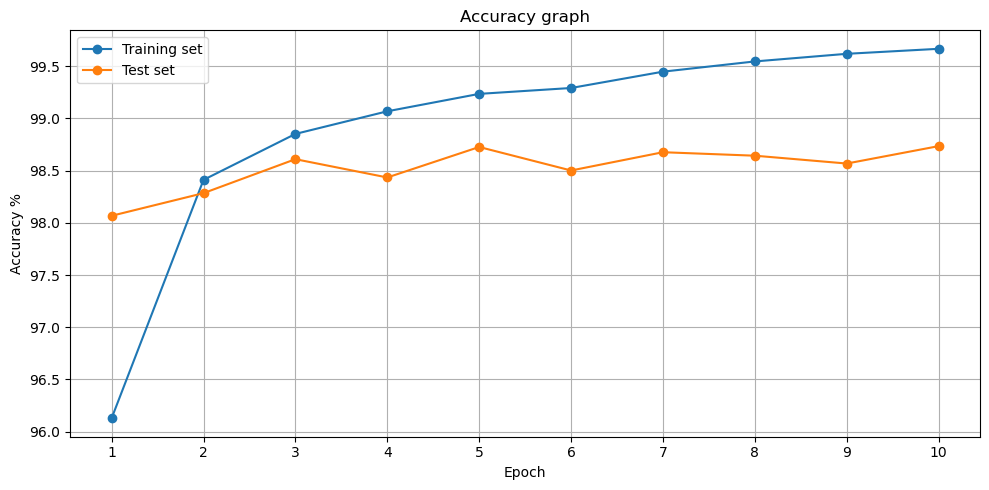

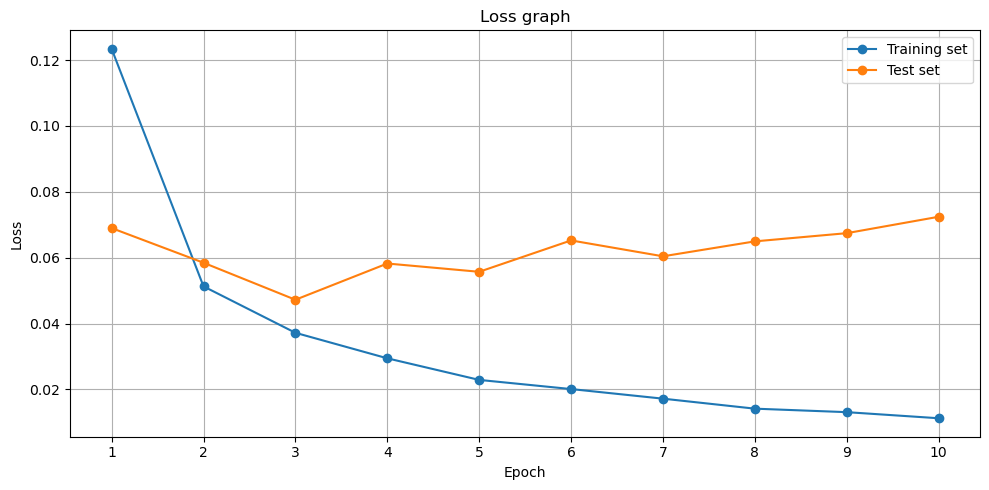

In [284]:
# MNIST Dataset
# Define the Neural network for the MNIST dataset

mnist_cnn_model = CNN_Model().to(device)
print('MNIST Dataset(Without Augmentation) - Training, Validation, Test sets - Loss and Accuracy\n')
mnist_train_accuracy, mnist_train_loss, mnist_val_accuracy, mnist_val_loss, mnist_test_accuracy, mnist_test_loss = train_validate_test(
    mnist_cnn_model,
    mnist_custom_train_dataloader,
    mnist_custom_val_dataloader,
    mnist_custom_test_dataloader,
    epochs
)

# Visualize the graph for accuracy and loss
print('Visualization of Accuracy and loss plot for MNIST dataset(Without Augmentation)\n')
visualize_metrics(mnist_train_accuracy, mnist_train_loss, mnist_test_accuracy, mnist_test_loss)

# Fashion MNIST dataset (without augmentation) - Metrics and Visualization

Fashion MNIST Dataset(Without Augmentation) - Training, Validation, Test sets - Loss and Accuracy

Epoch 1
Trainng set
Loss: 0.4117    Accuracy: 85.16%
Test set
Loss: 0.3129    Accuracy: 89.07%

Epoch 2
Trainng set
Loss: 0.2877    Accuracy: 89.60%
Test set
Loss: 0.2754    Accuracy: 90.22%

Epoch 3
Trainng set
Loss: 0.2542    Accuracy: 90.83%
Test set
Loss: 0.2585    Accuracy: 90.77%

Epoch 4
Trainng set
Loss: 0.2315    Accuracy: 91.59%
Test set
Loss: 0.3187    Accuracy: 88.42%

Epoch 5
Trainng set
Loss: 0.2160    Accuracy: 92.09%
Test set
Loss: 0.2552    Accuracy: 91.07%

Epoch 6
Trainng set
Loss: 0.2030    Accuracy: 92.68%
Test set
Loss: 0.2544    Accuracy: 90.95%

Epoch 7
Trainng set
Loss: 0.1934    Accuracy: 92.96%
Test set
Loss: 0.2849    Accuracy: 89.76%

Epoch 8
Trainng set
Loss: 0.1862    Accuracy: 93.25%
Test set
Loss: 0.2831    Accuracy: 90.55%

Epoch 9
Trainng set
Loss: 0.1792    Accuracy: 93.37%
Test set
Loss: 0.2759    Accuracy: 90.93%

Epoch 10
Trainng set
Loss: 0.1724    

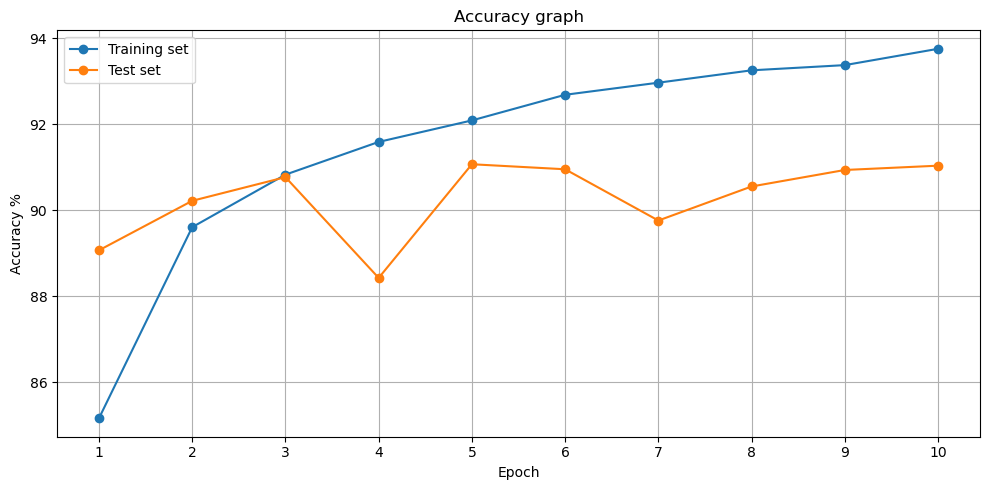

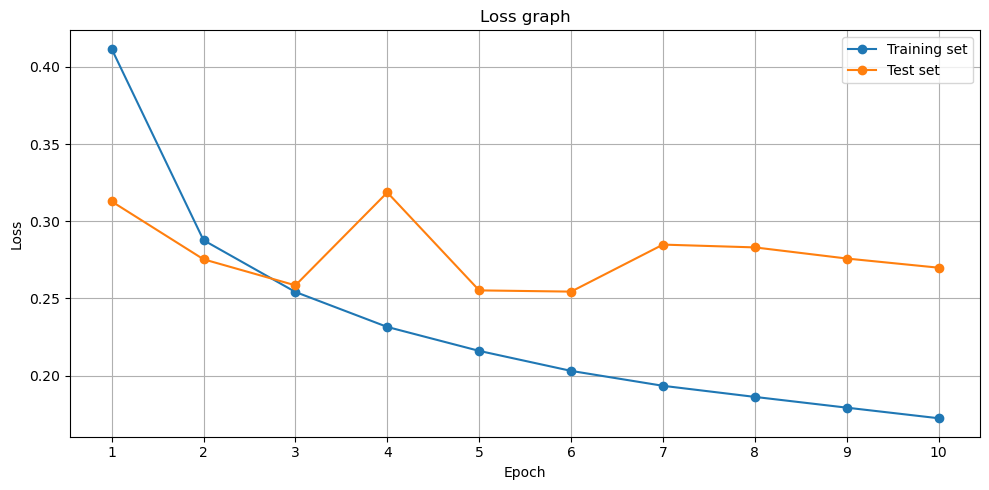

In [285]:
# Fashion MNIST dataset
# Define the Neural network for the Fashion-MNIST dataset

fashion_mnist_cnn_model = CNN_Model().to(device)
print('Fashion MNIST Dataset(Without Augmentation) - Training, Validation, Test sets - Loss and Accuracy\n')
fashion_mnist_train_accuracy, fashion_mnist_train_loss, fashion_mnist_val_accuracy, fashion_mnist_val_loss, fashion_mnist_test_accuracy, fashion_mnist_test_loss = train_validate_test(
    fashion_mnist_cnn_model,
    fashion_mnist_custom_train_dataloader,
    fashion_mnist_custom_val_dataloader,
    fashion_mnist_custom_test_dataloader,
    epochs
)
# Visualize the graph for accuracy and loss
print('Visualization of Accuracy and loss plot for Fashion MNIST dataset(Without Augmentation)\n')
visualize_metrics(fashion_mnist_train_accuracy, fashion_mnist_train_loss, fashion_mnist_test_accuracy, fashion_mnist_test_loss)

## 3. Data Augmentation


The datasets [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) and [MNIST](http://yann.lecun.com/exdb/mnist/) will be the testbed to investigate the impact of data augmentation. The source code from the last assignment can be used for data loading and model training. The network architecture can be the same from the last assignment as well. The data loading and augmentation can be done using the modules `torch.utils.data` and `torchvision`. Moreover, the dataset can be loaded from PyTorch class from each dataset.
 
*Task Output*: The required augmentation for this task is random affine with degree set to 20, translate (0.1,0.1) and scale (0.9,1.1). Moreover, color jitter should be applied on top with brightness set to 0.2 and also contrast to 0.2. At first, a model without augmentation should be trained. The performance on the test set will be the output of the task. Second, a model with data augmentation should be trained. The new performance on test will be now reported and compared to the accuracy without data augmentation.

*Important*: The scripts should be **self-contained**. The data augmentation should be dinamically implemented, i.e it is applied when the data from the mini-batch is loaded.

# Tranformation and Plotting function

In [286]:
from PIL import Image

# Convert to PIL Image
def to_PIL(image):
    if not isinstance(image, Image.Image):
        image = Image.fromarray(image)
    return image

# Visualize performance of test set with and without augmentation
def visualize_test_accuracies(test_accuracy_no_aug, test_accuracy_with_aug):
    epoch = range(1, len(test_accuracy_no_aug) + 1)
    plt.figure(figsize = (10, 5))
    plt.plot(epoch, test_accuracy_no_aug, label = 'Without augmentation', marker = 'o')
    plt.plot(epoch, test_accuracy_with_aug, label = 'With augmentation', marker = 'o')
    plt.title('Test accuracy for datasets with and without data augmentation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy %')
    plt.legend()
    plt.grid(True)
    plt.xticks(epoch)
    plt.tight_layout()
    plt.show()
    
# To apply transform on training dataset
transform_augmentation = transforms.Compose([
    to_PIL,
    transforms.RandomAffine(degrees=20, translate=(0.1, 0.1), scale=(0.9, 1.1)),   # Random Affine
    transforms.ColorJitter(brightness=0.2, contrast=0.2),                          # Color Jitter
    transforms.ToTensor(),                                                         # PIL to Tensor
])

# Dataloaders for augmented datasets

In [287]:
# Loading custom dataset to train the model
# The data should divided into Training set, Validation set and Test set respectively
# Apply transform before training the model

# MNIST dataset
mnist_custom_dataset_with_aug = CustomClassification(
        root = './data/mnist', 
        train = True, 
        transform = transform_augmentation, 
        url = 'http://yann.lecun.com/exdb/mnist/'
)

mnist_custom_train_dataset_with_aug, mnist_custom_val_dataset_with_aug = train_val_size(mnist_custom_dataset_with_aug)

# MNIST dataloader
mnist_custom_train_dataloader_with_aug = DataLoader(
        mnist_custom_train_dataset_with_aug, 
        batch_size = 4, 
        shuffle = True
)
mnist_custom_val_dataloader_with_aug = DataLoader(
        mnist_custom_val_dataset_with_aug, 
        batch_size = 4, 
        shuffle = False
)
mnist_custom_test_dataloader = DataLoader(
        mnist_custom_test_dataset, 
        batch_size = 4, 
        shuffle = False
)

#Fashion MNIST dataset
fashion_mnist_custom_dataset_with_aug = CustomClassification(
        root = './data/Fashionmnist', 
        train = True, 
        transform = transform_augmentation, 
        url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/'
)

fashion_mnist_custom_train_dataset_with_aug, fashion_mnist_custom_val_dataset_with_aug = train_val_size(fashion_mnist_custom_dataset_with_aug)

# Fashion-MNIST dataloader
fashion_mnist_custom_train_dataloader_with_aug = DataLoader(
        fashion_mnist_custom_train_dataset_with_aug, 
        batch_size = 4, 
        shuffle = True
)
fashion_mnist_custom_val_dataloader_with_aug = DataLoader(
        fashion_mnist_custom_val_dataset_with_aug, 
        batch_size = 4, 
        shuffle = False
)
fashion_mnist_custom_test_dataloader = DataLoader(
        fashion_mnist_custom_test_dataset, 
        batch_size = 4, 
        shuffle = False
)

# MNIST dataset (with augmentation) - Metrics and Visualization

MNIST Dataset(With Augmentation) - Training, Validation, Test sets - Loss and Accuracy

Epoch 1
Trainng set
Loss: 0.3499    Accuracy: 89.04%
Test set
Loss: 0.2071    Accuracy: 93.40%

Epoch 2
Trainng set
Loss: 0.1777    Accuracy: 94.58%
Test set
Loss: 0.1886    Accuracy: 94.04%

Epoch 3
Trainng set
Loss: 0.1419    Accuracy: 95.71%
Test set
Loss: 0.1331    Accuracy: 95.96%

Epoch 4
Trainng set
Loss: 0.1266    Accuracy: 96.18%
Test set
Loss: 0.1084    Accuracy: 96.62%

Epoch 5
Trainng set
Loss: 0.1186    Accuracy: 96.36%
Test set
Loss: 0.1122    Accuracy: 96.67%

Epoch 6
Trainng set
Loss: 0.1101    Accuracy: 96.65%
Test set
Loss: 0.1138    Accuracy: 96.42%

Epoch 7
Trainng set
Loss: 0.1040    Accuracy: 96.80%
Test set
Loss: 0.1057    Accuracy: 97.04%

Epoch 8
Trainng set
Loss: 0.1056    Accuracy: 96.90%
Test set
Loss: 0.1064    Accuracy: 96.77%

Epoch 9
Trainng set
Loss: 0.0987    Accuracy: 97.03%
Test set
Loss: 0.0985    Accuracy: 97.06%

Epoch 10
Trainng set
Loss: 0.0962    Accuracy: 9

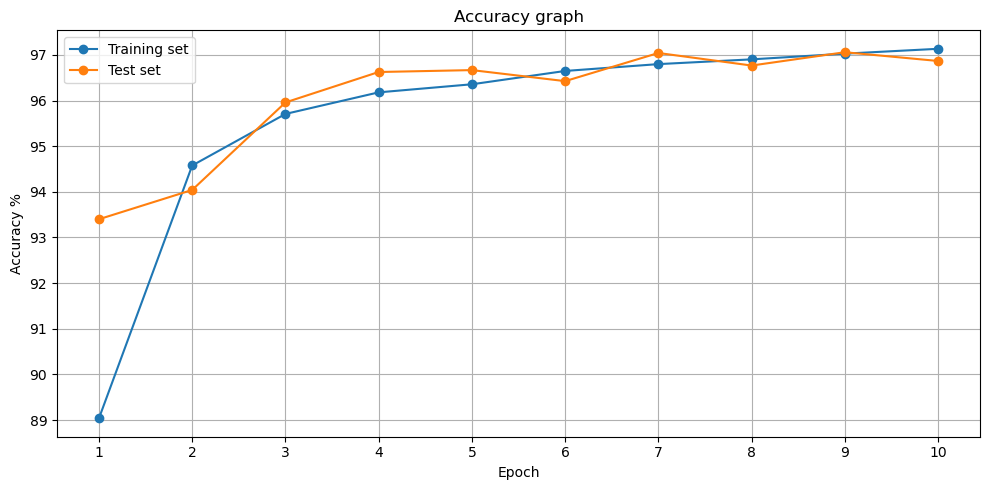

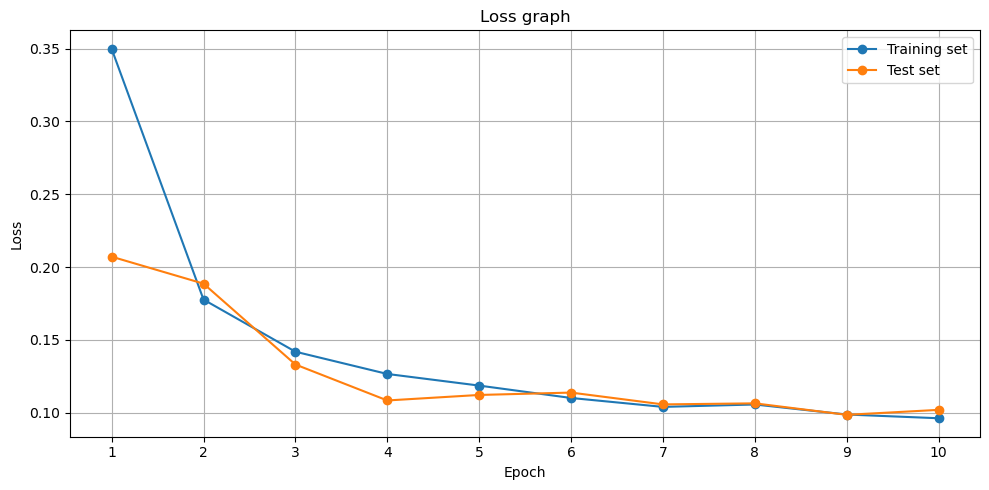

In [288]:
# MNIST Dataset
# Define the Neural network for the MNIST dataset with data augmentation

mnist_cnn_model_with_aug = CNN_Model().to(device)
print('MNIST Dataset(With Augmentation) - Training, Validation, Test sets - Loss and Accuracy\n')
mnist_train_accuracy_aug, mnist_train_loss_aug, mnist_val_accuracy_aug, mnist_val_loss_aug, mnist_test_accuracy_aug, mnist_test_loss_aug = train_validate_test(
    mnist_cnn_model_with_aug,
    mnist_custom_train_dataloader_with_aug,
    mnist_custom_val_dataloader_with_aug,
    mnist_custom_test_dataloader,
    epochs
)

# Visualize the graph for accuracy and loss
print('Visualization of Accuracy and loss plot for MNIST dataset(With Augmentation)\n')
visualize_metrics(mnist_train_accuracy_aug, mnist_train_loss_aug, mnist_test_accuracy_aug, mnist_test_loss_aug)

# Fashion MNIST dataset (with augmentation) - Metrics and Visualization

Fashion MNIST Dataset(With Augmentation) - Training, Validation, Test sets - Loss and Accuracy

Epoch 1
Trainng set
Loss: 0.6747    Accuracy: 74.85%
Test set
Loss: 0.5793    Accuracy: 78.09%

Epoch 2
Trainng set
Loss: 0.5261    Accuracy: 80.53%
Test set
Loss: 0.5008    Accuracy: 81.74%

Epoch 3
Trainng set
Loss: 0.4862    Accuracy: 81.95%
Test set
Loss: 0.4745    Accuracy: 82.14%

Epoch 4
Trainng set
Loss: 0.4716    Accuracy: 82.52%
Test set
Loss: 0.4477    Accuracy: 83.51%

Epoch 5
Trainng set
Loss: 0.4600    Accuracy: 83.07%
Test set
Loss: 0.4432    Accuracy: 83.50%

Epoch 6
Trainng set
Loss: 0.4534    Accuracy: 83.26%
Test set
Loss: 0.4454    Accuracy: 83.77%

Epoch 7
Trainng set
Loss: 0.4492    Accuracy: 83.24%
Test set
Loss: 0.4425    Accuracy: 83.52%

Epoch 8
Trainng set
Loss: 0.4402    Accuracy: 83.86%
Test set
Loss: 0.4357    Accuracy: 83.71%

Epoch 9
Trainng set
Loss: 0.4384    Accuracy: 83.66%
Test set
Loss: 0.4371    Accuracy: 83.78%

Epoch 10
Trainng set
Loss: 0.4329    Acc

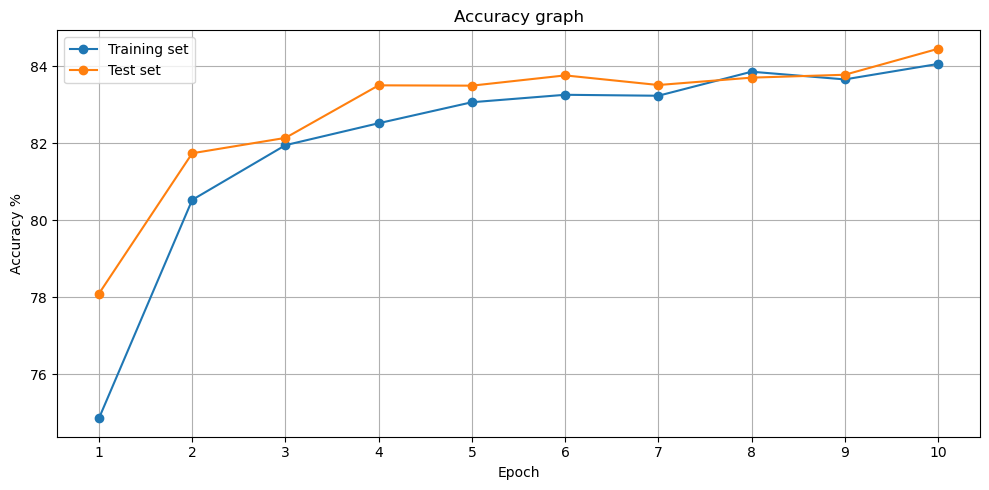

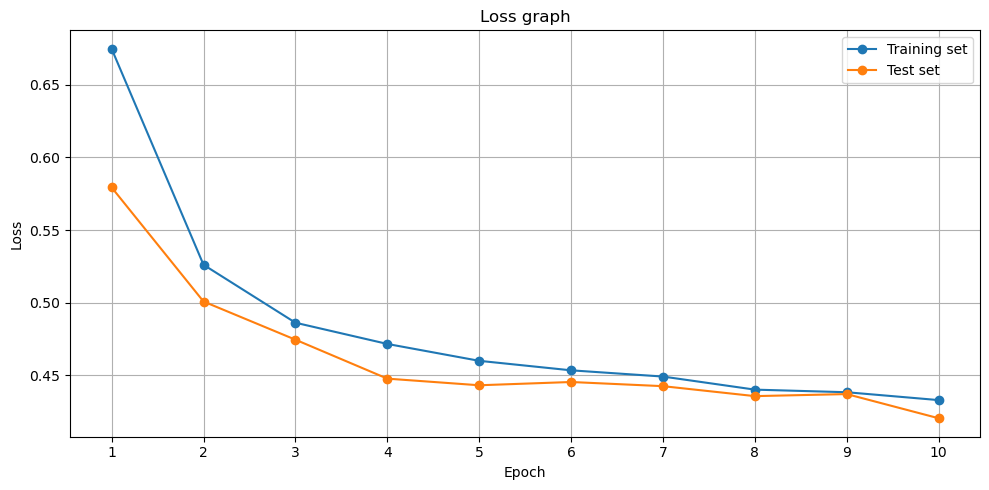

In [289]:
# Fashion MNIST dataset
# Define the Neural network for the Fashion-MNIST dataset with data augmentation

fashion_mnist_cnn_model_with_aug = CNN_Model().to(device)
print('Fashion MNIST Dataset(With Augmentation) - Training, Validation, Test sets - Loss and Accuracy\n')
fashion_mnist_train_accuracy_aug, fashion_mnist_train_loss_aug, fashion_mnist_val_accuracy_aug, fashion_mnist_val_loss_aug, fashion_mnist_test_accuracy_aug, fashion_mnist_test_loss_aug = train_validate_test(
    fashion_mnist_cnn_model_with_aug,
    fashion_mnist_custom_train_dataloader_with_aug,
    fashion_mnist_custom_val_dataloader_with_aug,
    fashion_mnist_custom_test_dataloader,
    epochs
)
# Visualize the graph for accuracy and loss
print('Visualization of Accuracy and loss plot for Fashion MNIST dataset(With Augmentation)\n')
visualize_metrics(fashion_mnist_train_accuracy_aug, fashion_mnist_train_loss_aug, fashion_mnist_test_accuracy_aug, fashion_mnist_test_loss_aug)

# Performance comparison of test datasets with and without augmentation


MNIST dataset


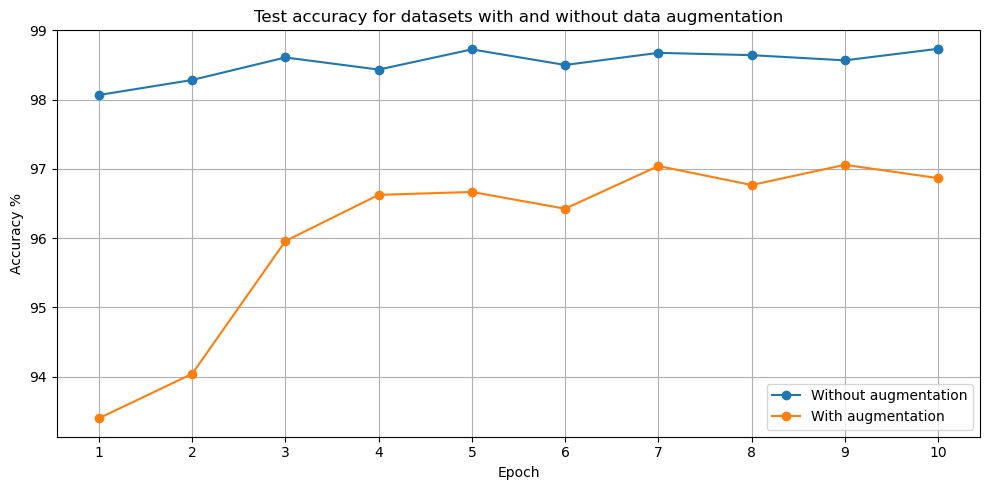

Fashion MNIST dataset


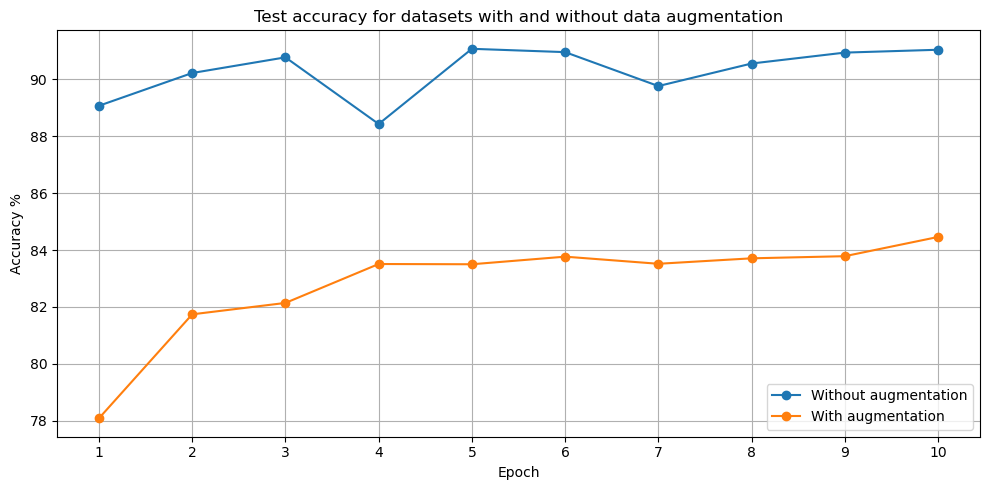

In [290]:
# Performance comparison for MNIST dataset
print('\nMNIST dataset')
visualize_test_accuracies(mnist_test_accuracy, mnist_test_accuracy_aug)

# Performance comparison for Fashion MNIST dataset
print('Fashion MNIST dataset')
visualize_test_accuracies(fashion_mnist_test_accuracy, fashion_mnist_test_accuracy_aug)